In [66]:
# import libraries
%matplotlib inline
import numpy as np
#import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.spatial
import scipy.stats

def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y)
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [3]:
meta = pd.DataFrame(pd.read_csv('../IntraUrbanTemperatureVariabilityBaltimore/data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype(int), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv('../IntraUrbanTemperatureVariabilityBaltimore/data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H').first()
tempDF.columns = tempDF.columns.astype(int)

In [7]:
tempDF['2016-07-01': '2016-07-05'].resample('D').min()

,82,139,130,32,10,129,105,80,34,71,...,62,24,75,65,85,29,144,21,134,44
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,21.878,19.334,18.854,21.645,21.044,21.223,23.523,23.412,22.092,23.283,...,23.676,22.136,19.433,23.062,21.090,22.628,19.376,20.611,19.492,21.098
2016-07-02,19.940,18.833,18.416,20.144,20.544,20.284,21.397,21.285,20.591,21.470,...,22.050,21.636,17.868,21.811,19.150,21.628,18.813,19.109,18.930,21.098
2016-07-03,19.440,18.395,17.228,19.143,20.044,19.346,20.771,20.284,19.590,20.719,...,20.550,20.634,17.555,19.809,18.962,20.127,18.376,19.109,18.554,20.097
2016-07-04,19.690,17.770,18.478,20.144,19.543,20.159,20.771,20.847,20.091,21.094,...,20.987,20.133,17.931,20.622,19.713,20.127,17.812,19.109,17.929,20.097
2016-07-05,21.691,17.707,22.043,22.146,22.545,22.223,22.460,22.474,22.092,22.470,...,22.550,22.637,21.373,22.249,22.092,22.128,17.687,22.612,17.804,22.599


In [94]:
startdate ='2016-07-01' 
enddate = '2016-08-31' 
urban = tempDF[97] # science center['2016-07-01']
rural = tempDF[68] # rural , Darryn's house
dt_min = (urban.resample('D').min()-rural.resample('D').min())[startdate:enddate]
dt_concurrent = (urban[urban.index.hour == 6] - rural[rural.index.hour==6])[startdate:enddate]

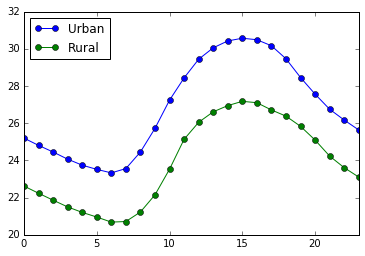

In [106]:
urban.groupby(urban.index.hour).mean().plot(label = 'Urban', style = 'o-')
rural.groupby(rural.index.hour).mean().plot(label = 'Rural', style = 'o-')
plt.legend(loc=2)

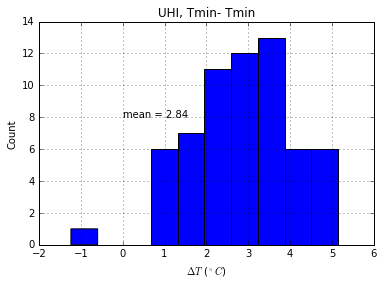

In [101]:
dt_min.hist()
plt.title('UHI, Tmin- Tmin')
plt.text(0,8, 'mean = %2.2f'%dt_min.mean())
plt.xlabel('$\Delta T$ ($^\circ C$)')
plt.ylabel('Count')

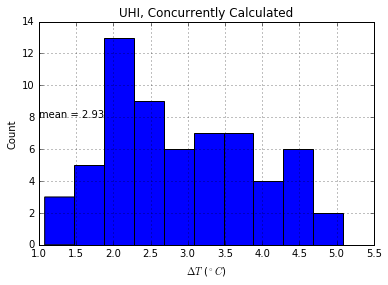

In [102]:
dt_concurrent.hist()
plt.text(1,8, 'mean = %2.2f'%dt_concurrent.mean())
plt.title('UHI, Concurrently Calculated')
plt.xlabel('$\Delta T$ ($^\circ C$)')
plt.ylabel('Count')

(-0.30687941215470543, -0.52695661328134158, 1.0825462354233808e-05)

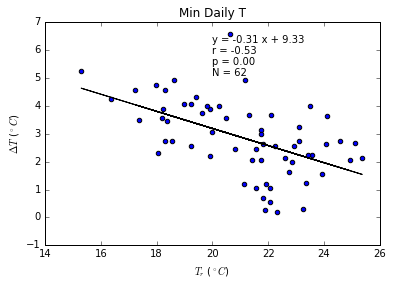

In [92]:
easy_scatter(rural.resample('D').min()[startdate:enddate] , 
             dt_min,
            '$\Delta T$ computed from Min Daily T', '$T_r$ ($^\circ C$)', '$\Delta T$ ($^\circ C$)')

(-0.23921436828174397, -0.5395044177939049, 6.0474044485861789e-06)

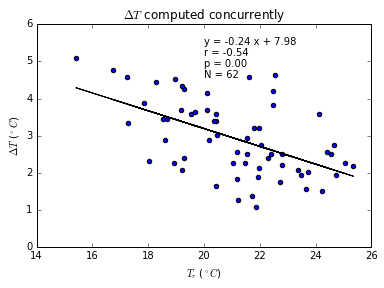

In [99]:
easy_scatter(rural.resample('D').min()[startdate:enddate].values , 
             dt_concurrent.values,
            '$\Delta T$ computed concurrently', '$T_r$ ($^\circ C$)', '$\Delta T$ ($^\circ C$)')